In [1]:


import torch
import torch.nn as nn
import torch.functional as F 
from tqdm import tqdm
from model.mscred import MSCRED
from utils.data import load_data
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
criterion = nn.MSELoss()
def train(dataLoader, model, optimizer, epochs, device):
    # model = model.to(device)
    # model.cuda()
    print("------training on {}-------".format(device))
    for epoch in range(epochs):
        train_l_sum,n = 0.0, 0
        for x in dataLoader:
            # print(x[0])
            x = x[0].to(device)
            # x_org=x
            # print(x.shape)
            # x = x.squeeze()
            print(x.shape)
            output=model(x)
                         
            #print(type(x))
            # l = torch.mean((model(x)-x[-1].unsqueeze(0))**2)
            # l = torch.mean((model(x).cuda()-x_org[-1])**2)
            l=criterion(output,x[-1])
            train_l_sum += l
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            n += 1
            #print("[Epoch %d/%d][Batch %d/%d] [loss: %f]" % (epoch+1, epochs, n, len(dataLoader), l.item()))
            
        print("[Epoch %d/%d] [loss: %f]" % (epoch+1, epochs, train_l_sum/n))

In [3]:
def test(dataLoader, model):
    print("------Testing-------")
    index = 800
    loss_list = []
    reconstructed_data_path = "./data/matrix_data/reconstructed_data/"
    with torch.no_grad():
        for x in dataLoader:
            
            x = x.to(device)
            x = x.squeeze()
            reconstructed_matrix = model(x) 
            path_temp = os.path.join(reconstructed_data_path, 'reconstructed_data_' + str(index) + ".npy")
            np.save(path_temp, reconstructed_matrix.cpu().detach().numpy())
            # l = criterion(reconstructed_matrix, x[-1].unsqueeze(0)).mean()
            # loss_list.append(l)
            # print("[test_index %d] [loss: %f]" % (index, l.item()))
            index += 1

In [4]:
# if __name__ == '__main__':
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device is", device)
dataLoader = load_data(train=True)
mscred = MSCRED(3, 256).cuda()

# 训练阶段
# mscred.load_state_dict(torch.load("./checkpoints/model1.pth"))
optimizer = torch.optim.Adam(mscred.parameters(), lr = 0.0002)
train(dataLoader, mscred, optimizer, 10, device)
print("保存模型中....")
torch.save(mscred.state_dict(), "./checkpoints/model2.pth")

# # 测试阶段
mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
mscred.to(device)
test(dataLoader["test"], mscred)

In [4]:
import torch
import torch.nn as nn
import torch.functional as F 
from tqdm import tqdm
from model.mscred import MSCRED
from utils.data import load_data
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
def train(dataLoader, model, optimizer, epochs, device):
    model = model.to(device)
    print("------training on {}-------".format(device))
    for epoch in range(epochs):
        train_l_sum,n = 0.0, 0
        for x in tqdm(dataLoader):
            x = x.to(device)
            x = x.squeeze()
            #print(type(x))
            l = torch.mean((model(x)-x[-1].unsqueeze(0))**2)
            train_l_sum += l
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            n += 1
            #print("[Epoch %d/%d][Batch %d/%d] [loss: %f]" % (epoch+1, epochs, n, len(dataLoader), l.item()))
            
        print("[Epoch %d/%d] [loss: %f]" % (epoch+1, epochs, train_l_sum/n))

In [6]:
def test(dataLoader, model):
    print("------Testing-------")
    index = 800
    loss_list = []
    reconstructed_data_path = "./data/matrix_data/reconstructed_data/"
    with torch.no_grad():
        for x in dataLoader:
            x = x.to(device)
            x = x.squeeze()
            reconstructed_matrix = model(x) 
            path_temp = os.path.join(reconstructed_data_path, 'reconstructed_data_' + str(index) + ".npy")
            np.save(path_temp, reconstructed_matrix.cpu().detach().numpy())
            # l = criterion(reconstructed_matrix, x[-1].unsqueeze(0)).mean()
            # loss_list.append(l)
            # print("[test_index %d] [loss: %f]" % (index, l.item()))
            index += 1

In [8]:
if __name__ == '__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("device is", device)
    dataLoader = load_data()
    mscred = MSCRED(3, 256)

device is cuda


In [ ]:
    # 训练阶段
    # mscred.load_state_dict(torch.load("./checkpoints/model1.pth"))
    optimizer = torch.optim.Adam(mscred.parameters(), lr = 0.0002)
    train(dataLoader["train"], mscred, optimizer, 10, device)
    print("保存模型中....")
    torch.save(mscred.state_dict(), "./checkpoints/model2.pth")

In [ ]:
    # # 测试阶段
    mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
    mscred.to(device)
    test(dataLoader["test"], mscred)


In [7]:
# # # 测试阶段
# mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
# mscred.to(device)
# test(dataLoader["test"], mscred)
# print("Done")

In [16]:
class flags_struct:
    def __init__(self,
                 nb_epochs: int,
                 runs:int,
                 eps: float,
                 adv_train:bool,
                 is_categorical:bool,
                 batch_size:int,
                 UCR_datasets:list):
        self.nb_epochs=nb_epochs
        self.runs=runs
        self.eps=eps
        self.adv_train=adv_train
        self.is_categorical=is_categorical
        self.batch_size=batch_size
        self.UCR_datasets=UCR_datasets
        

FLAGS=flags_struct(nb_epochs=2000,
                   runs=3,
                   eps=0.1,
                   adv_train=False,
                   is_categorical=False,
                   batch_size=1024,
                   UCR_datasets=['50words'])
import sys
sys.path.append("E:\\Project\\Kari_anomaly_2\\Adversarial_attacks\\cleverhans")
from cleverhans.torch.attacks.fast_gradient_method import fast_gradient_method
from cleverhans.torch.attacks.projected_gradient_descent import projected_gradient_descent
from cleverhans.torch.attacks.carlini_wagner_l2 import carlini_wagner_l2
from cleverhans.torch.attacks.sparse_l1_descent import sparse_l1_descent
from cleverhans.torch.attacks.hop_skip_jump_attack import hop_skip_jump_attack
from cleverhans.torch.attacks.spsa import spsa
from cleverhans.torch.attacks.carlini_wagner_l2 import carlini_wagner_l2
def test_FGSM(dataLoader, model,attack_name="FGSM"):
    print("------Testing-------")
    index = 800
    loss_list = []
    
    reconstructed_data_path_FGSM_linf = "./data/matrix_data/reconstructed_data_FGSM_linf/"
    reconstructed_data_path_FGSM_l1 = "./data/matrix_data/reconstructed_data_FGSM_l1/"
    reconstructed_data_path_FGSM_l2 = "./data/matrix_data/reconstructed_data_FGSM_l2/"
    reconstructed_data_path_PGD_linf = "./data/matrix_data/reconstructed_data_PGD_linf/"
    # reconstructed_data_path_PGD_l1 = "./data/matrix_data/reconstructed_data_PGD_l1/"
    reconstructed_data_path_PGD_l2 = "./data/matrix_data/reconstructed_data_PGD_l2/"
    reconstructed_data_path_SL1D = "./data/matrix_data/reconstructed_data_SL1D/"
    # reconstructed_data_path_HSJ= "./data/matrix_data/reconstructed_data_HSJ/"
    # reconstructed_data_path_CWl2= "./data/matrix_data/reconstructed_data_CWl2/"
    # with torch.no_grad():
    full_X=[]
    full_SL1D=[]
    full_FGSM_linf=[]
    full_FGSM_l1=[]
    full_FGSM_l2=[]
    full_PGD_linf=[]
    full_PGD_l1=[]
    full_PGD_l2=[]
    full_HSJ_linf=[]
    full_HSJ_l2=[]
    full_SPSA_linf=[]
    full_SPSA_l1=[]
    full_SPSA_l2=[]
    full_CWl2=[]
    
    check=0
    for x in dataLoader:
        x = x.to(device)
        x = x.squeeze()
        # print(x.shape)
        mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
        mscred.to(device)
        x_SL1D = sparse_l1_descent(model,x,eps=10.0,eps_iter=1.0,nb_iter=20)
        
        mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
        mscred.to(device)
        x_PGD_linf = projected_gradient_descent(model, x, FLAGS.eps, 0.01, 40, np.inf)
        
        mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
        mscred.to(device)
        # x_PGD_l1 = projected_gradient_descent(model, x, FLAGS.eps, 0.01, 40, 1)
        x_PGD_l2 = projected_gradient_descent(model, x, FLAGS.eps, 0.01, 40, 2)
    
        mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
        mscred.to(device)
        x_FGSM_linf = fast_gradient_method(model, x, FLAGS.eps, np.inf)
        
        mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
        mscred.to(device)
        x_FGSM_l1 = fast_gradient_method(model, x, FLAGS.eps, 1)
        
        mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
        mscred.to(device)
        x_FGSM_l2 = fast_gradient_method(model, x, FLAGS.eps, 2)
        
       
        
        
        # x_HSJ_l2 = hop_skip_jump_attack(model,x,2)
        # x_HSJ_linf = hop_skip_jump_attack(model,x,np.inf)
        # x_SPSA_linf = spsa(model, x[0,:,:,:].reshape(1,x.shape[1],x.shape[2],x.shape[3]), FLAGS.eps,  40, np.inf)
        # x_SPSA_l1 = spsa(model, x, FLAGS.eps,  40, 1)
        # x_SPSA_l2 = spsa(model, x, FLAGS.eps,  40, 2)
        # x_CWl2=carlini_wagner_l2(model,x)
        
        
        reconstructed_matrix_FGSM_linf = model(x_FGSM_linf) 
        reconstructed_matrix_FGSM_l1 = model(x_FGSM_l1) 
        reconstructed_matrix_FGSM_l2 = model(x_FGSM_l2) 
        reconstructed_matrix_PGD_linf = model(x_PGD_linf) 
        # reconstructed_matrix_PGD_l1 = model(x_PGD_l1) 
        reconstructed_matrix_PGD_l2 = model(x_PGD_l2) 
        reconstructed_matrix_SL1D = model(x_SL1D) 
        # reconstructed_matrix_HSJ_linf = model(x_HSJ_linf) 
        # reconstructed_matrix_HSJ_l2 = model(x_HSJ_l2) 
        # reconstructed_matrix_SPSA_linf = model(x_SPSA_linf) 
        # reconstructed_matrix_SPSA_l1 = model(x_SPSA_l1) 
        # reconstructed_matrix_SPSA_l2 = model(x_SPSA_l2) 
        
        full_X.append(x.detach().cpu().numpy())
        full_FGSM_linf.append(x_FGSM_linf.detach().cpu().numpy())
        full_FGSM_l1.append(x_FGSM_l1.detach().cpu().numpy())
        full_FGSM_l2.append(x_FGSM_l2.detach().cpu().numpy())
        full_PGD_linf.append(x_PGD_linf.detach().cpu().numpy())
        # full_PGD_l1.append(x_PGD_l1.detach().cpu().numpy())
        full_PGD_l2.append(x_PGD_l2.detach().cpu().numpy())
        full_SL1D.append(x_SL1D.detach().cpu().numpy())
        # full_HSJ_linf.append(x_HSJ_linf.detach().cpu().numpy())
        # full_HSJ_l2.append(x_HSJ_l2.detach().cpu().numpy())
        # full_SPSA_linf.append(x_SPSA_linf.detach().cpu().numpy())
        # full_SPSA_l1.append(x_SPSA_l1.detach().cpu().numpy())
        # full_SPSA_l2.append(x_SPSA_l2.detach().cpu().numpy())
        
        
        check +=1
        print(check,end=",")
        if check%20==0:
            print()
        # if check ==2:
        #     break
        # else:
        #     s=1
        path_temp = os.path.join(reconstructed_data_path_FGSM_linf, 'reconstructed_data_' + str(index) + ".npy")
        np.save(path_temp, reconstructed_matrix_FGSM_linf.cpu().detach().numpy())
        path_temp = os.path.join(reconstructed_data_path_FGSM_l1, 'reconstructed_data_' + str(index) + ".npy")
        np.save(path_temp, reconstructed_matrix_FGSM_l1.cpu().detach().numpy())
        path_temp = os.path.join(reconstructed_data_path_FGSM_l2, 'reconstructed_data_' + str(index) + ".npy")
        np.save(path_temp, reconstructed_matrix_FGSM_l2.cpu().detach().numpy())
        
        path_temp = os.path.join(reconstructed_data_path_PGD_linf, 'reconstructed_data_' + str(index) + ".npy")
        np.save(path_temp, reconstructed_matrix_PGD_linf.cpu().detach().numpy())
        path_temp = os.path.join(reconstructed_data_path_PGD_l2, 'reconstructed_data_' + str(index) + ".npy")
        np.save(path_temp, reconstructed_matrix_PGD_l2.cpu().detach().numpy())

        path_temp = os.path.join(reconstructed_data_path_SL1D, 'reconstructed_data_' + str(index) + ".npy")
        np.save(path_temp, reconstructed_matrix_SL1D.cpu().detach().numpy())
        index += 1
    return full_X, full_SL1D, full_FGSM_linf, full_FGSM_l1, full_FGSM_l2, full_PGD_linf, full_PGD_l1, full_PGD_l2, full_HSJ_linf, full_HSJ_l2, full_SPSA_linf, full_SPSA_l1, full_SPSA_l2

    # return full_X, full_FGSM, full_PGD, full_SL1D
mscred.load_state_dict(torch.load("./checkpoints/model2.pth"))
mscred.to(device)
# f_x,f_FGSM,f_PGD, f_SL1D =test_FGSM(dataLoader["test"], mscred)

f_X,f_SL1D,f_FGSM_linf,f_FGSM_l1,f_FGSM_l2,f_PGD_linf,f_PGD_l1,f_PGD_l2,f_HSJ_linf,f_HSJ_l2,f_SPSA_linf,f_SPSA_l1,f_SPSA_l2=test_FGSM(dataLoader["test"], mscred)
print("Done")

------Testing-------
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,
81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,
121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,
141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,
161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,
181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,
201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,
221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,
241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,
261,262,263,264,265,266,267,268,26

E:\Project\Kari_anomaly_2\Adversarial_attacks\Pytorch-MSCRED\model\mscred.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attention_w = torch.reshape(m(torch.stack(attention_w)), (-1, 5))


In [17]:

f_X=np.concatenate(f_X, axis=0)

f_FGSM_linf=np.concatenate(f_FGSM_linf, axis=0)
f_FGSM_l1=np.concatenate(f_FGSM_l1, axis=0)
f_FGSM_l2=np.concatenate(f_FGSM_l2, axis=0)

f_PGD_linf=np.concatenate(f_PGD_linf, axis=0)
# f_PGD_l1=np.concatenate(f_PGD_l1, axis=0)
f_PGD_l2=np.concatenate(f_PGD_l2, axis=0)

# f_HSJ_linf=np.concatenate(f_HSJ_linf, axis=0)
# f_HSJ_l2=np.concatenate(f_HSJ_l2, axis=0)

f_SL1D=np.concatenate(f_SL1D, axis=0)

# f_SPSA_linf=np.concatenate(f_SPSA_linf, axis=0)
# f_SPSA_l1=np.concatenate(f_SPSA_l1, axis=0)
# f_SPSA_l2=np.concatenate(f_SPSA_l2, axis=0)

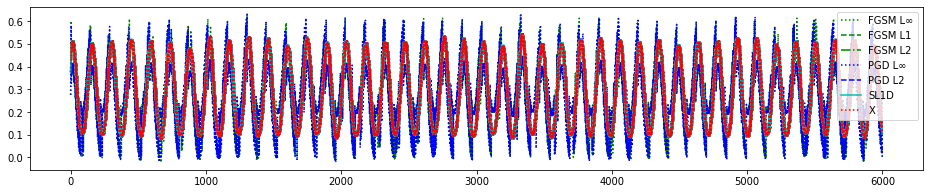

In [18]:
plt.figure(figsize=(16,3))
plt.plot(f_FGSM_linf[:,2,0,0],'g:')
plt.plot(f_FGSM_l1[:,2,0,0],'g--')
plt.plot(f_FGSM_l2[:,2,0,0],'g-.')

plt.plot(f_PGD_linf[:,2,0,0],'b:')
plt.plot(f_PGD_l2[:,2,0,0],'b--')

plt.plot(f_SL1D[:,2,0,0],'c')


plt.plot(f_X[:,2,0,0],'r:')
plt.legend(["FGSM L∞","FGSM L1","FGSM L2","PGD L∞","PGD L2","SL1D","X"])

In [19]:
print("Done")

Done


In [20]:
print("Done")

Done
